In [17]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import scipy.stats as ss

In [63]:
# import sys
# !conda install --yes --prefix {sys.prefix} -c anaconda numpy

## CD

### End-measures

In [66]:
df = pd.read_csv('./cd-run-end.csv').drop(columns=['[run number]', '[step]'], axis=1)
df = df.rename(columns={'get-cover-time': 'cover-time', 'get-reach-border-time': 'reach-border-time'})
df.dtypes

num                    int64
step-size            float64
num-directions         int64
cover-time             int64
reach-border-time      int64
dtype: object

In [70]:
df.groupby('num-directions')['cover-time'].mean()

num-directions
3    3655.916667
4    3756.500000
5    4297.250000
6    3888.000000
Name: cover-time, dtype: float64

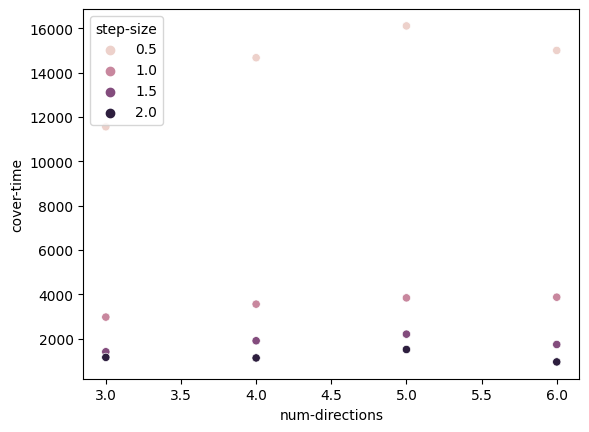

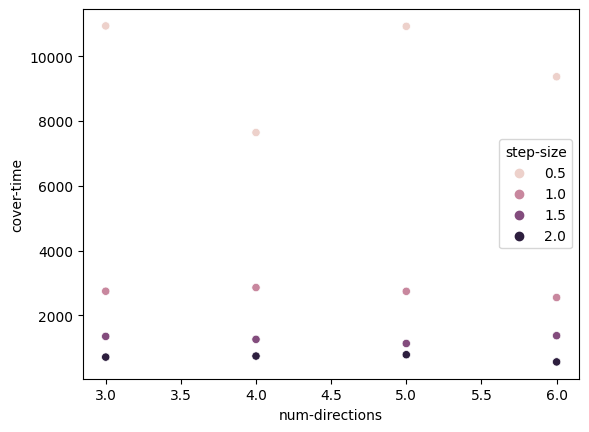

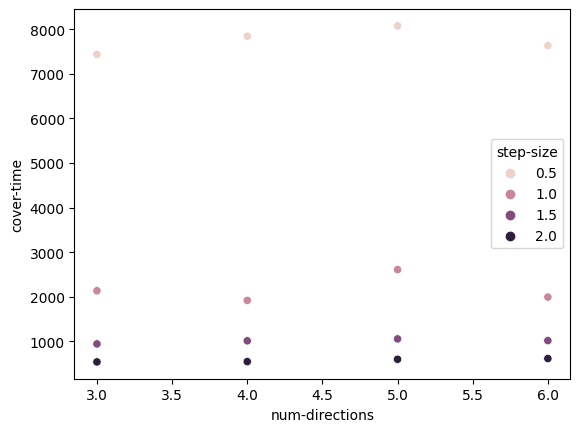

In [71]:
for num_agents in [100, 200, 300]:
    sns.scatterplot(data=df[df['num'] == num_agents], x='num-directions', y='cover-time', hue='step-size')
    plt.show()

1. For 100, 300 agents cover-time is slightly bigger (for each step-size) for 5 directions. For 200 agents cover-time is rather smaller for 4 directions.  
2. For step-size 1, 1.5 and 2 cover-time doesn't differ a lot. In both cases turtle move on new patch in each step on the average. But with step-size 0.5 turtles very often stays on the same patch after moving on the average.  
* Need to run more simulations to estimate means or just have more points.

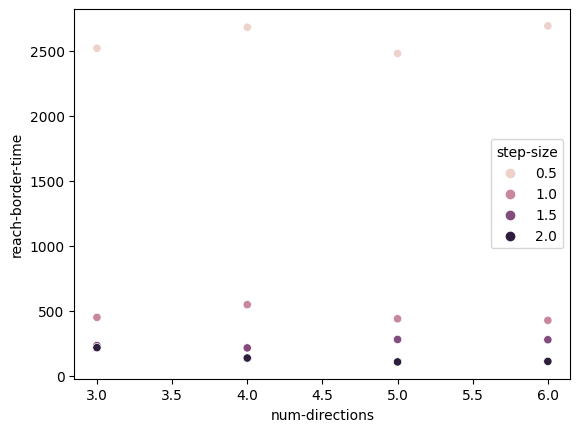

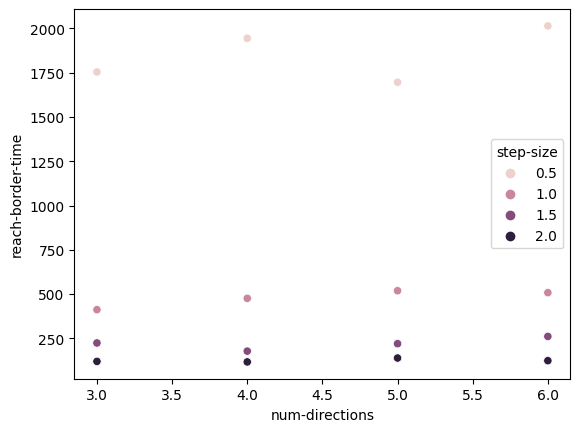

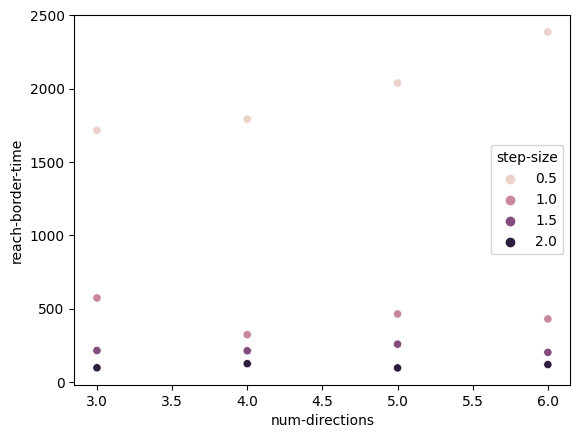

In [72]:
for num_agents in [100, 200, 300]:
    sns.scatterplot(data=df[df['num'] == num_agents], x='num-directions', y='reach-border-time', hue='step-size')
    plt.show()

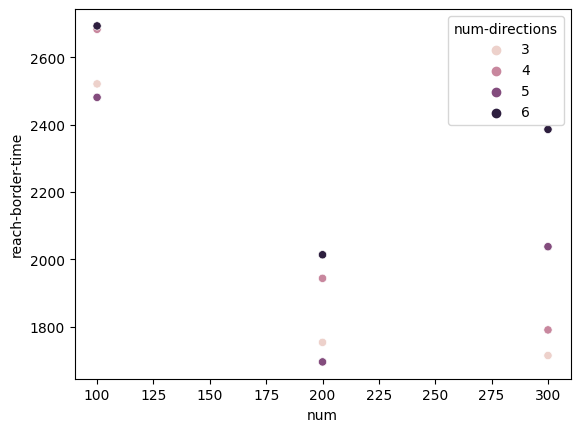

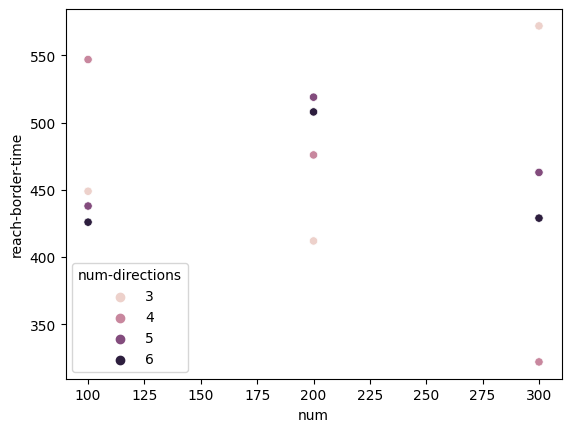

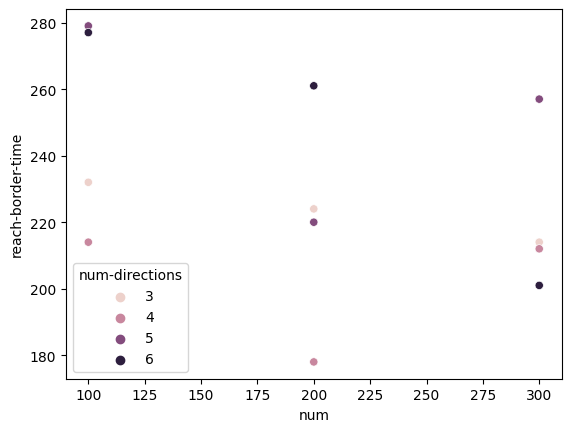

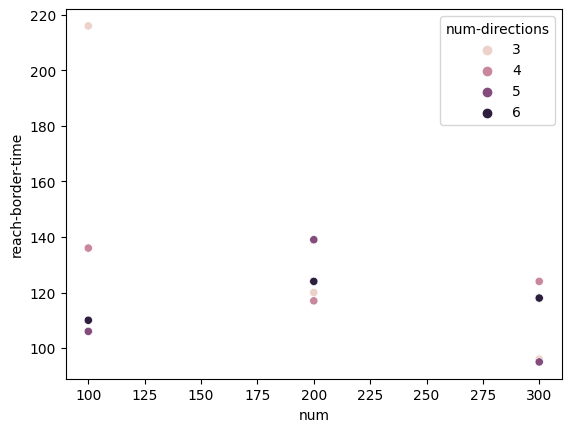

In [74]:
for step_size in sorted(df['step-size'].unique()):
    sns.scatterplot(data=df[df['step-size'] == step_size], x='num', y='reach-border-time', hue='num-directions')
    plt.show()

Can't detect correlations.

### Step-measures

In [51]:
df = pd.read_csv('cd-run-step-2.csv', skiprows=6).drop(columns=['[run number]'], axis=1)
df = df.rename(columns={'[step]': 'step', 'get-msd': 'est-msd', 'step-size * sqrt ticks': 'th-msd'})
df.columns

Index(['num', 'step-size', 'num-directions', 'step', 'est-msd', 'th-msd'], dtype='object')

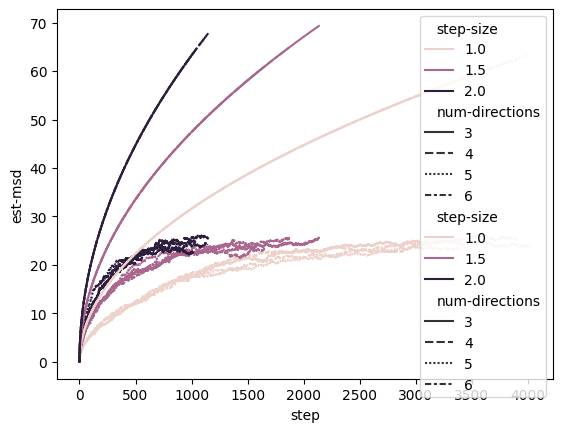

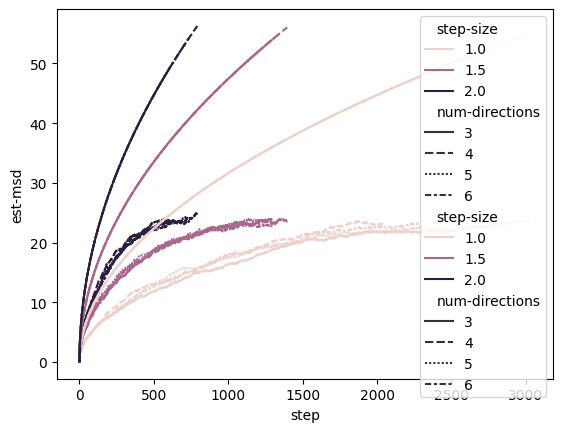

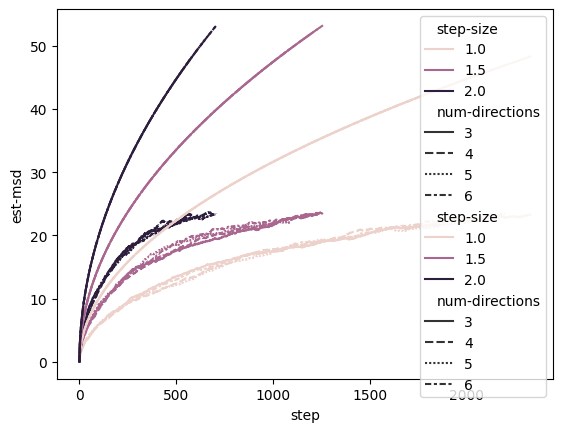

In [54]:
for num_agents in sorted(df['num'].unique()):
    sns.lineplot(data=df[df['num'] == num_agents], x='step', y='est-msd', hue='step-size', style='num-directions')
    sns.lineplot(data=df[df['num'] == num_agents], x='step', y='th-msd', hue='step-size', style='num-directions')
    plt.show()

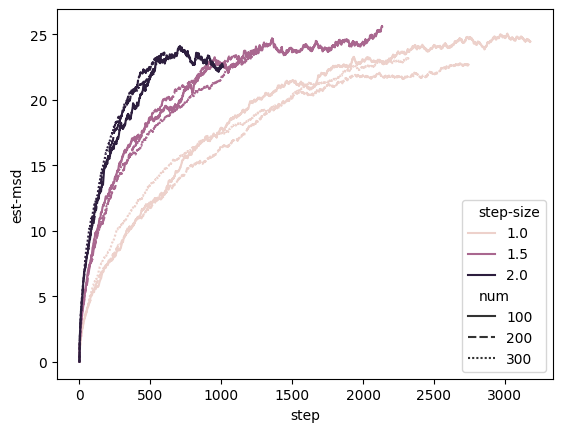

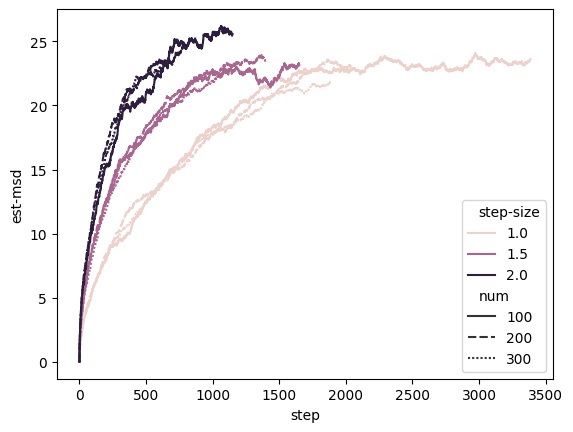

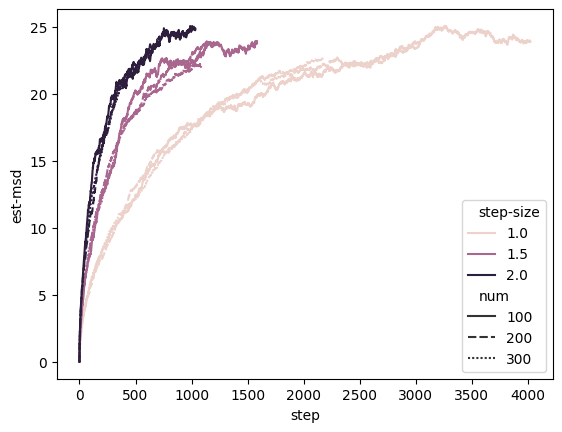

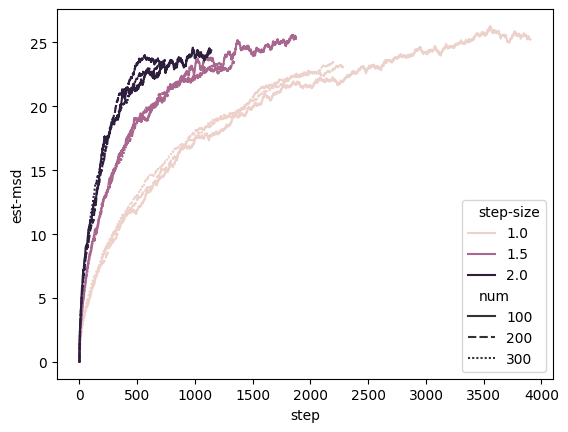

In [61]:
for num_directions in sorted(df['num-directions'].unique()):
    sns.lineplot(data=df[df['num-directions'] == num_directions], x='step', y='est-msd', hue='step-size', style='num')
    plt.show()

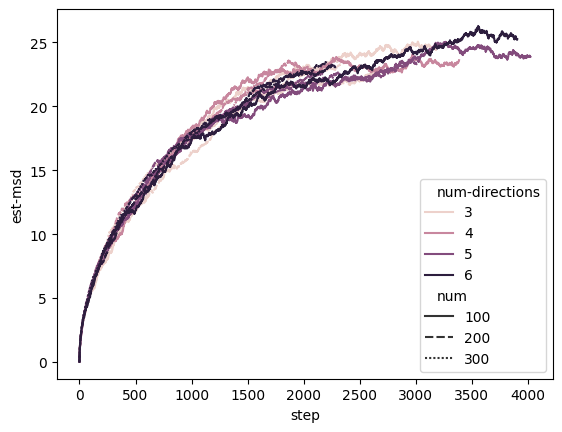

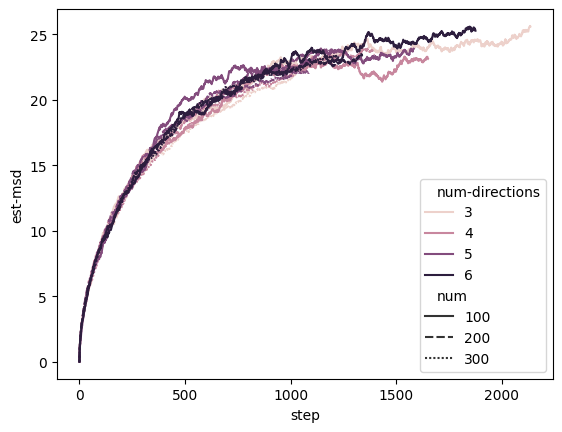

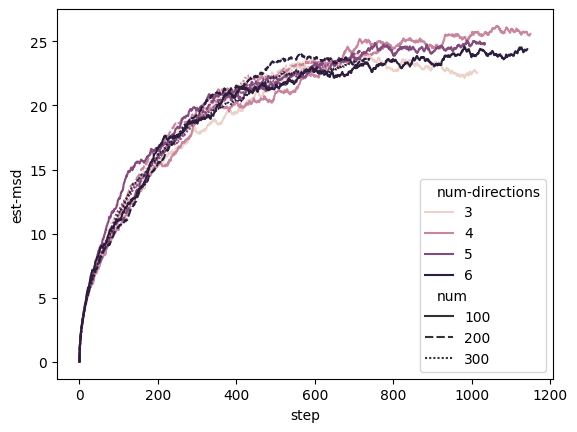

In [62]:
for step_size in sorted(df['step-size'].unique()):
    sns.lineplot(data=df[df['step-size'] == step_size], x='step', y='est-msd', hue='num-directions', style='num')
    plt.show()

1. msd doesn't depend on num-directions, num-agents. It depends only on step-size.
2. After particular threshold msd almost stops to grow. Agents come to world boundary and their coordinates stably stay near maximum possible coordinates. (30, 30) in current case.

![Constant displacement](img/cd-displacement.png)<br>
For all runs displacement is constant near 0. Therefore, I won't load data from experiments for it.

![Angles grid](img/cd-angles.png)<br>
For different num-directions angles plot form a particular "grid". Points have coordinates equal to possible angles. On image num-directions = 5.

## Deterministic

In [6]:
df = pd.read_csv('determ-run-end.csv', skiprows=6).drop(columns=['[run number]', 'num'])
df = df.rename(columns={'step-size': 'step_size', 'max-pxcor': 'max_pxcor', 'get-cover-time': 'cover_time', 'get-reach-border-time': 'border_time', '[step]': 'step'})
df.columns

Index(['step_size', 'r', 'max_pxcor', 'step', 'cover_time', 'border_time'], dtype='object')

### Moving patterns

I decided to include turtles patterns for different r's, 0.5 - 2.

![](img/r_0.5.png)
![](img/r_3.png)<br>
![](img/r_3.6.png)
![](img/r_3.8.png)

### End-measures

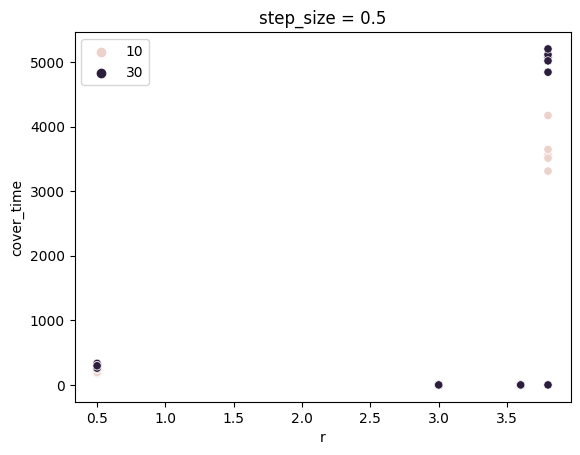

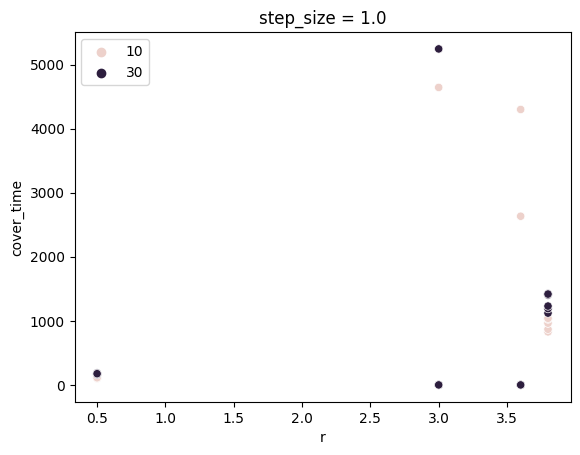

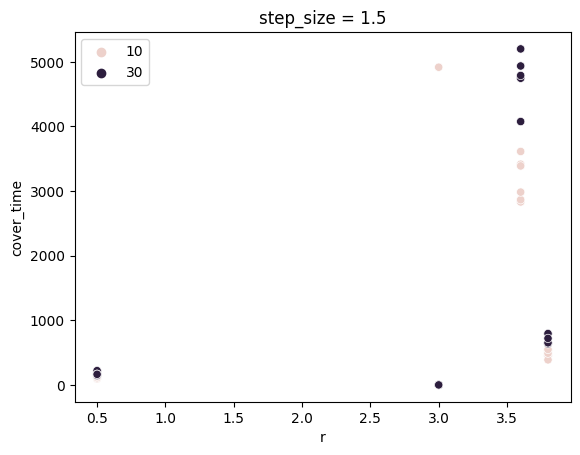

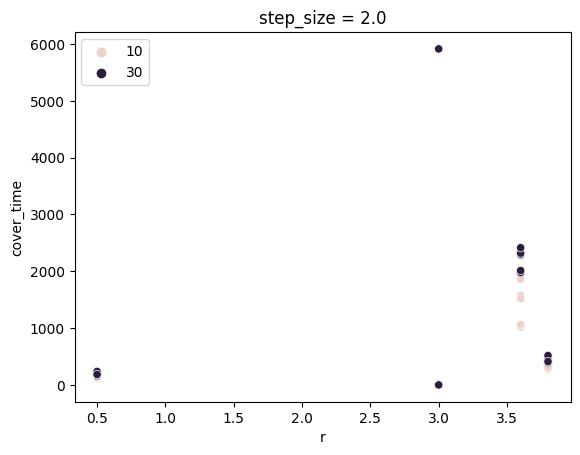

In [8]:
for step_size in sorted(df['step_size'].unique()):
    sns.scatterplot(data=df[df['step_size'] == step_size], x='r', y='cover_time', hue='max_pxcor').set(title=f'step_size = {step_size}')
    plt.legend(loc='upper left')
    plt.show()

I set the limit of 6000 ticks. Therefore, if cover_time = 0 it only means that turtles didn't cover world in 6000 ticks.

1. For small values of r, r = 0.5, turtles quickly cover the world, for any size of world and any step-size.
2. For bigger values of r, r = 3, the greater step_size - the greater chance to cover the world in limit of 6000 ticks.
3. For critical value of r, r = 3.6, the greater step_size - quicklier turtles cover the world. In general, observations are similar to r = 3.
4. For r = 4. Suprisingly, world is covered even for step_size = 0.5. For greater values of step-size, cover_time falls rapidly.

After all, region of r around r = 3, (1.5; 3.5), seems to be the most problematic to cover the world.

Try to use boxplot.

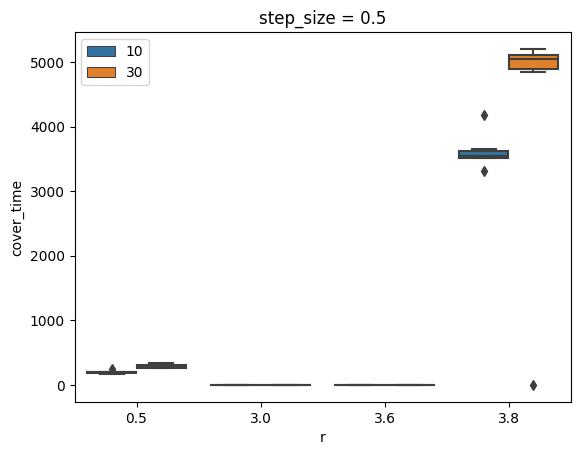

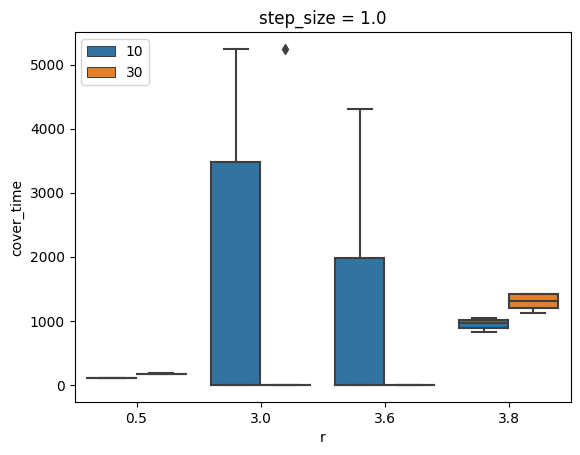

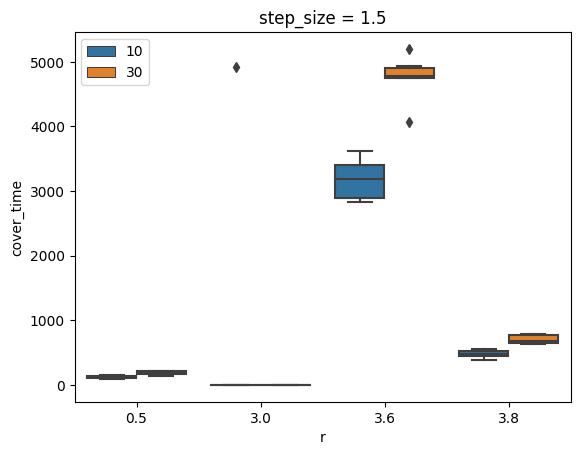

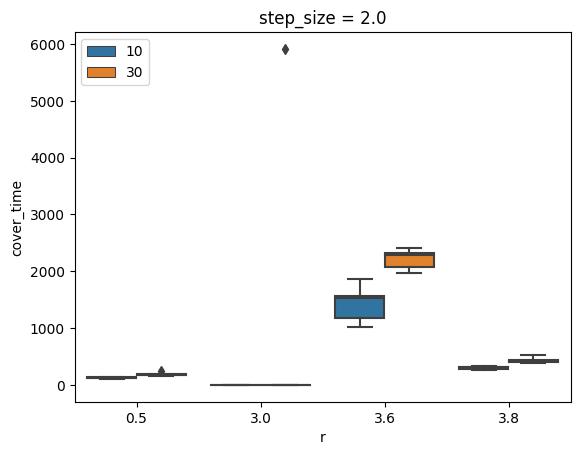

In [9]:
for step_size in sorted(df['step_size'].unique()):
    sns.boxplot(data=df[df['step_size'] == step_size], x='r', y='cover_time', hue='max_pxcor').set(title=f'step_size = {step_size}')
    plt.legend(loc='upper left')
    plt.show()

r = 3 is the most interesting. World was covered for smaller value, but wasn't for greater.  
I run a few experiments and found out that it happened just due to the chance. For one turtle equation solutions produces forward, instead of round, moving. And, maybe, step_size = 1 is optimal to cover world in the qickest way.

### Step-measures

In [13]:
df = pd.read_csv('determ-run-step.csv', skiprows=6).drop(columns=['[run number]', 'num'], axis=1)
df = df.rename(columns={'[step]': 'step', 'get-msd': 'est_msd', 'step-size * sqrt ticks': 'th_msd', 'step-size': 'step_size', 'max-pxcor': 'max_pxcor'})
df.columns

Index(['step_size', 'r', 'max_pxcor', 'step', 'est_msd', 'th_msd'], dtype='object')

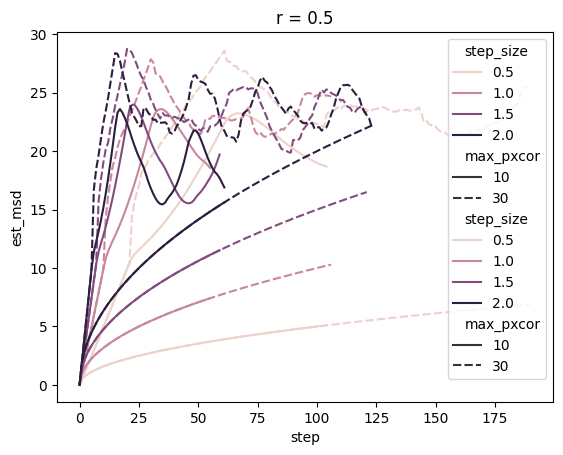

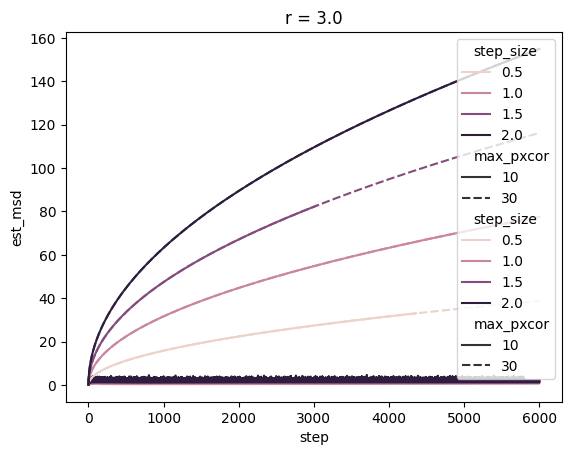

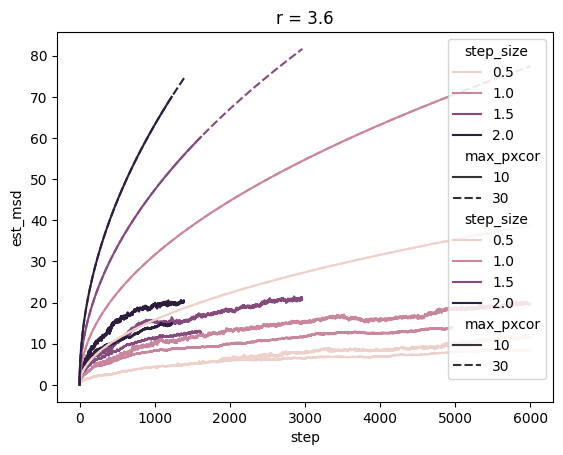

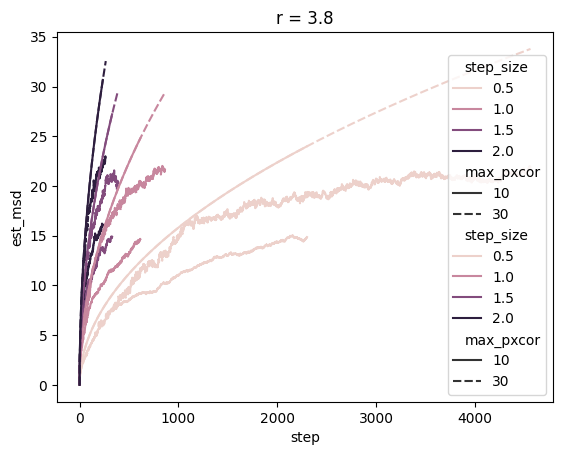

In [16]:
for r in sorted(df['r'].unique()):
    sns.lineplot(data=df[df['r'] == r], x='step', y='est_msd', hue='step_size', style='max_pxcor').set(title=f'r = {r}')
    sns.lineplot(data=df[df['r'] == r], x='step', y='th_msd', hue='step_size', style='max_pxcor')
    plt.show()

As we've seen, statistics mostly differs among different values of r. Therefore, I produced seperate plots for each value.

r = 0.5.  
Estimated msd grows rapidly up to world's boundaries (for different max_pxcor). Then it falls and ups. Turtles move to center and to boundaries again.

r = 3.  
Estimated msd stands near 0, because turtles didn't get out of center point.

r = 3.6.  
For step_size 1.5-2 estimated msd grows to world's limit. For step_size 0.5-1 it almost doesn't grow because turtles didn't get away from center.

r = 3.8.  
Type of turtles moving is very similar to original random walk. Therefore, estimated msd almost soincides with theroretical one for max_pxcor = 30. Whereas, mostly estimated msd doesn't coinside because it isn't original random walk.

In [17]:
df = pd.read_csv('determ_step_disp.csv', skiprows=6).drop(columns=['[run number]', 'num'], axis=1)
df = df.rename(columns={'[step]': 'step', 'get-displacement': 'disp', 'step-size': 'step_size', 'max-pxcor': 'max_pxcor'})
df.columns

Index(['step_size', 'r', 'max_pxcor', 'step', 'disp'], dtype='object')

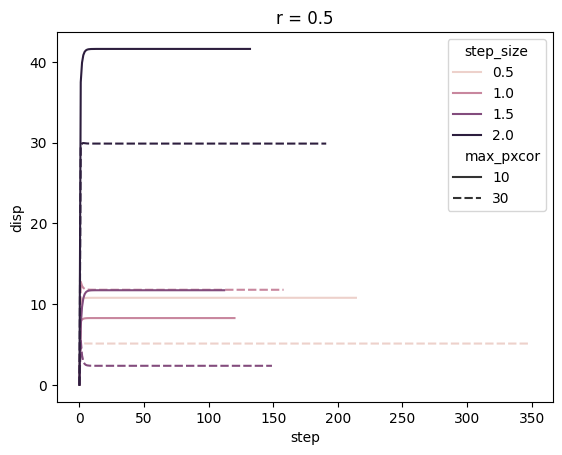

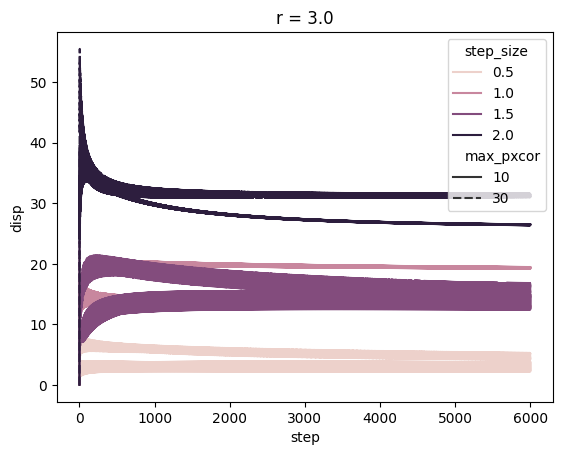

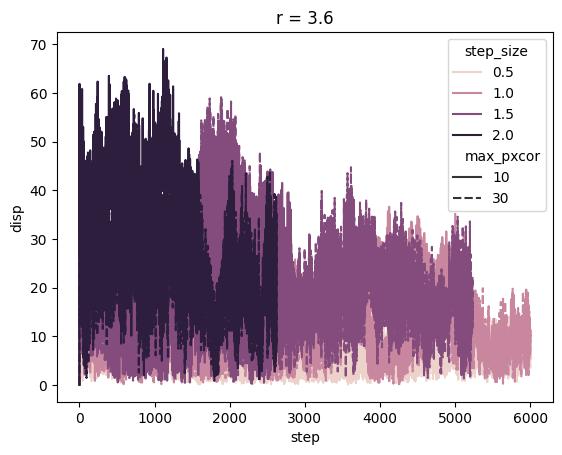

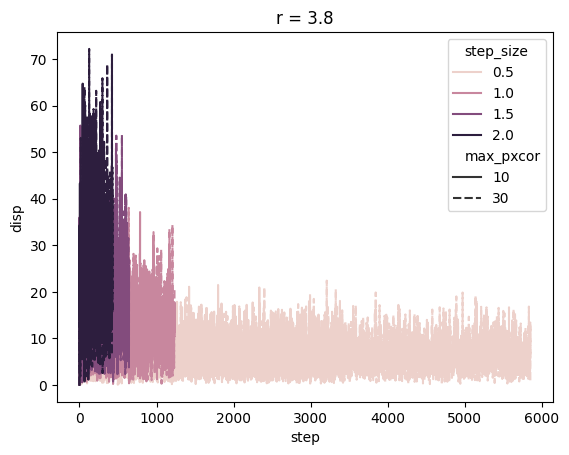

In [20]:
for r in sorted(df['r'].unique()):
    sns.lineplot(data=df[df['r'] == r], x='step', y='disp', hue='step_size', style='max_pxcor').set(title=f'r = {r}')
    plt.show()

For different values of r:
* 0.5:  
Displacement grows until particular measure. Then we have something like stable solution.

* 3:  
The same. But now stable solutions are visualized with stable orbits of turtles.

* 3.6 and 3.8:  
Displacement gets from some vaue to zero and back.

![Deterministic angles](img/determ-angles.png)<br>
Angles plot form from a part to whole parabola, for r from 0.5 to 3.8.

## Levy

Important: **step-size is a scale parameter in current case!**

### End-measures

In [8]:
df = pd.read_csv('levy-end.csv', skiprows=6).drop(columns=['[run number]', 'rw-type'])
df = df.rename(columns={'step-size': 'step_size', 'dist-type': 'dist_type', 'get-cover-time': 'cover_time', 'get-reach-border-time': 'border_time', '[step]': 'step'})
df.columns

Index(['step_size', 'num', 'dist_type', 'step', 'cover_time', 'border_time'], dtype='object')

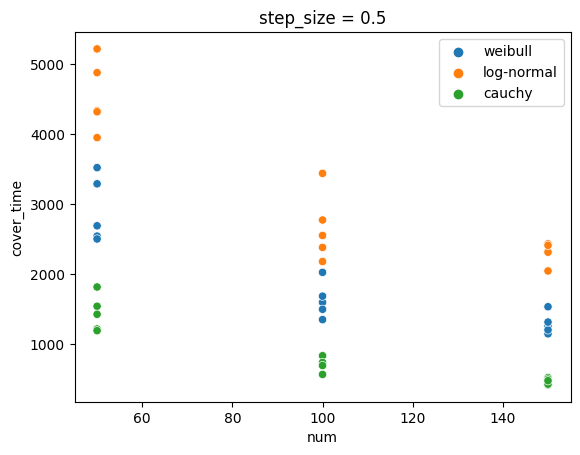

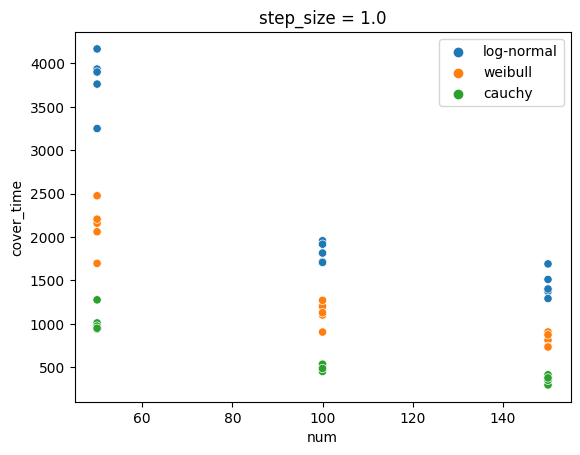

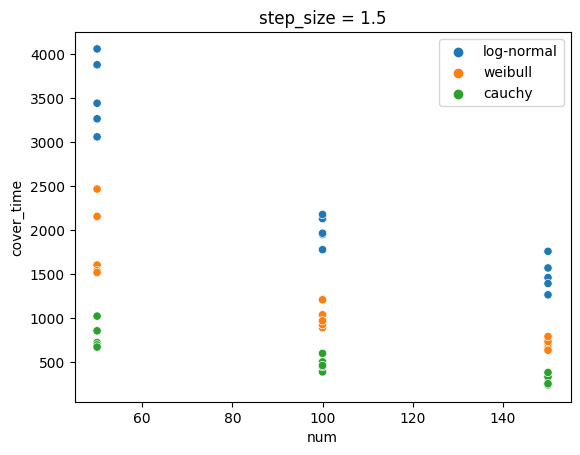

In [10]:
for step_size in sorted(df['step_size'].unique()):
    sns.scatterplot(data=df[df['step_size'] == step_size], x='num', y='cover_time', hue='dist_type').set(title=f'step_size = {step_size}')
    plt.legend(loc='upper right')
    plt.show()

1. Negative correlation between num of agents and cover time.
2. Distribution types for ordered cover time for: cauchy, weibull, log-normal.

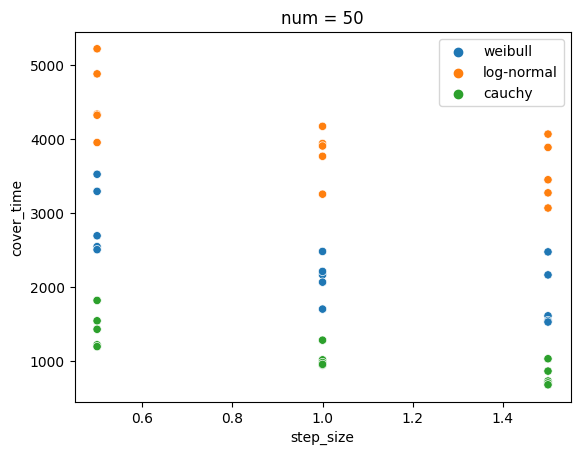

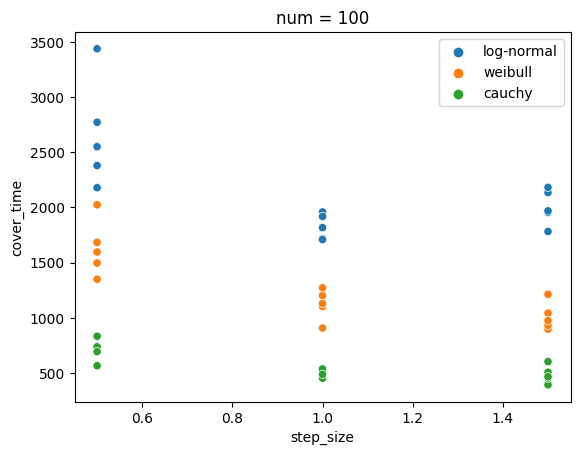

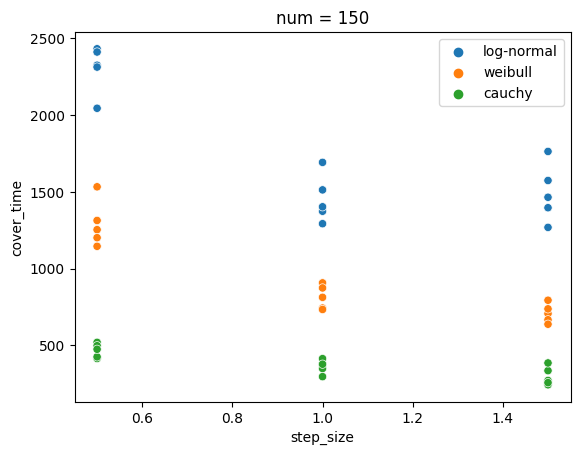

In [13]:
for num in sorted(df['num'].unique()):
    sns.scatterplot(data=df[df['num'] == num], x='step_size', y='cover_time', hue='dist_type').set(title=f'num = {num}')
    plt.legend(loc='upper right')
    plt.show()

1. Mainly there is negative correlation between step size and cover time. But for log-normal distribution there is very small change for step size 1 and 1.5, for num of agents 100 and 150.

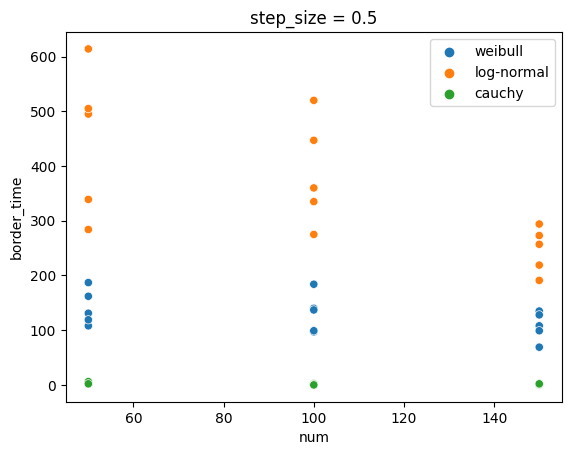

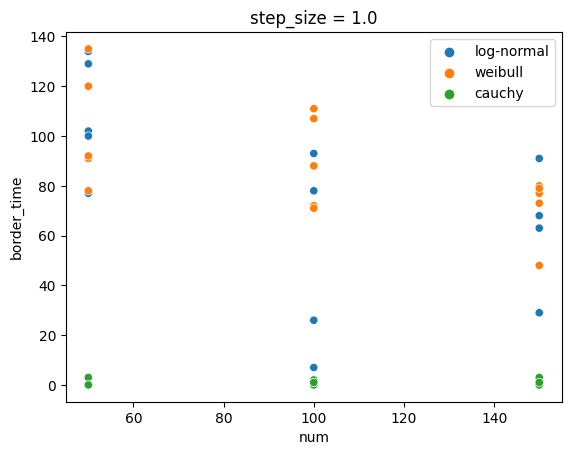

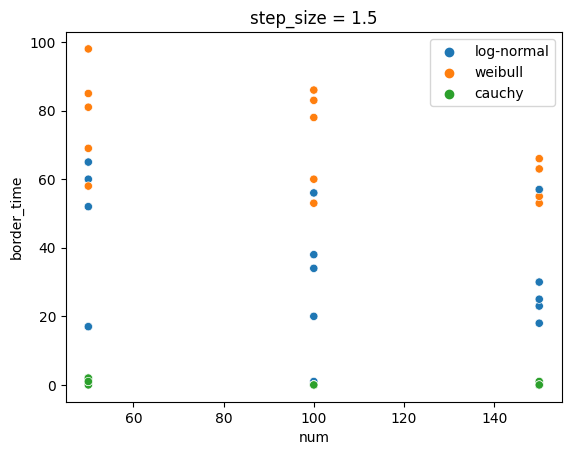

In [14]:
for step_size in sorted(df['step_size'].unique()):
    sns.scatterplot(data=df[df['step_size'] == step_size], x='num', y='border_time', hue='dist_type').set(title=f'step_size = {step_size}')
    plt.legend(loc='upper right')
    plt.show()

1. Num of agents. For smaller num of agents num of ticks to reach border is greater.
2. Distributions. Largest time to reach border for log-normal distribution.

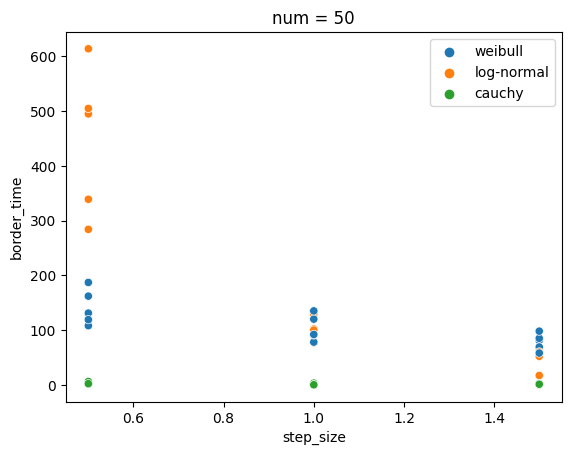

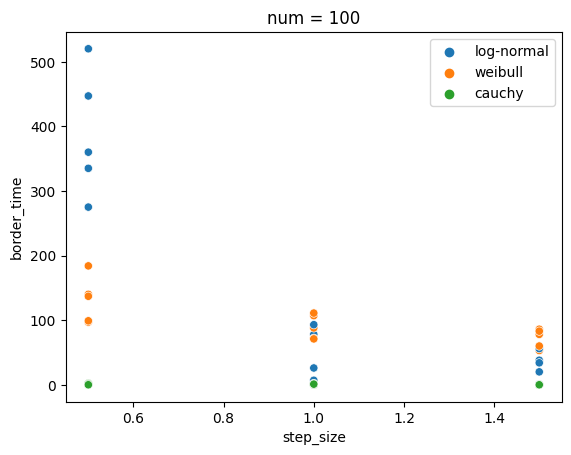

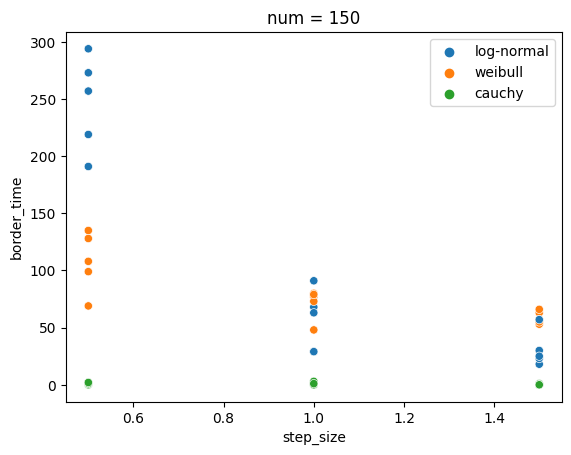

In [25]:
for num in sorted(df['num'].unique()):
    sns.scatterplot(data=df[df['num'] == num], x='step_size', y='border_time', hue='dist_type').set(title=f'num = {num}')
    plt.legend(loc='upper right')
    plt.show()

1. Negative correlation between scale parameter and time to reach border.

Let's plot pdf of Weibull distribution to show why we have such a dependence.

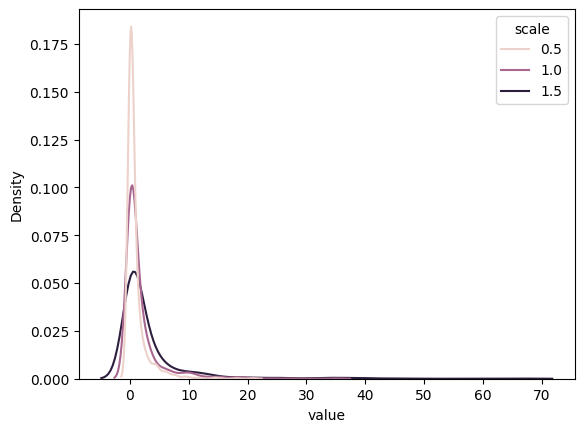

In [36]:
ys = []
    
for idx, scale in enumerate(sorted(df['step_size'].unique())):
    ys.append(pd.DataFrame(scale * np.random.weibull(a=0.5, size=1000), columns=['value']))
y = pd.concat(ys, axis=0, keys=list(sorted(df['step_size'].unique()))).reset_index()
y = y.rename(columns={'level_0': 'scale'}).drop(columns=['level_1'])

sns.kdeplot(data=y, x='value', hue='scale')
plt.show()

For 0.5 scale parameter probability of values near 0 is rather higher than for higher parameter values. Simultaniuosly, probability of bigger values is smaller. Therefore, for 0.5 scale parameter on the average step-sizes are smaller, and it takes longer for turtles to get to the border.

### Step-measures

In [40]:
df = pd.read_csv('levy-msd.csv', skiprows=6).drop(columns=['[run number]'], axis=1)
df = df.rename(columns={'[step]': 'step', 'get-msd': 'est_msd', 'step-size * sqrt ticks': 'th_msd', 'step-size': 'scale', 'dist-type': 'dist_type'})
df.columns

Index(['scale', 'num', 'dist_type', 'step', 'est_msd', 'th_msd'], dtype='object')

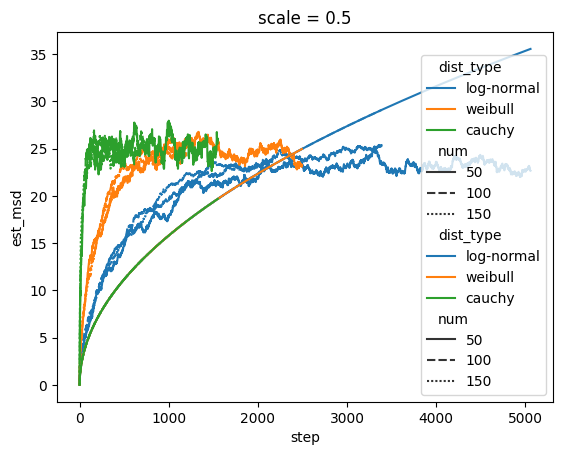

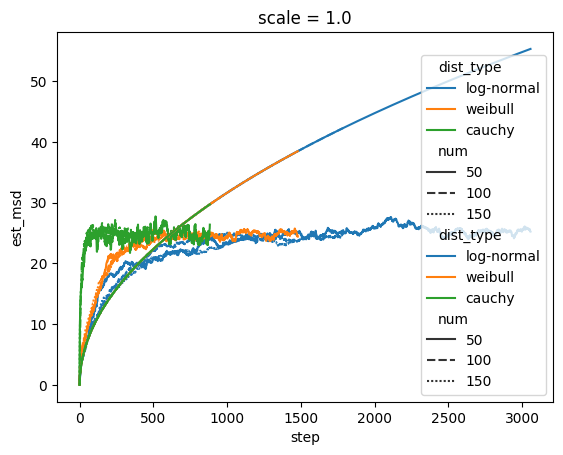

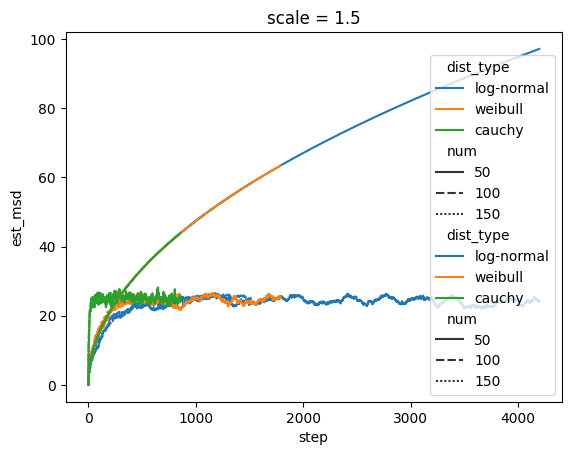

In [41]:
for scale in sorted(df['scale'].unique()):
    sns.lineplot(data=df[df['scale'] == scale], x='step', y='est_msd', hue='dist_type', style='num').set(title=f'scale = {scale}')
    sns.lineplot(data=df[df['scale'] == scale], x='step', y='th_msd', hue='dist_type', style='num')
    plt.show()

1. Num of agents. Doesn't depend on it.
2. Type of distribution. For cauchy steps are the largest - msd grows the fastest to the world's limits. Where it stops.

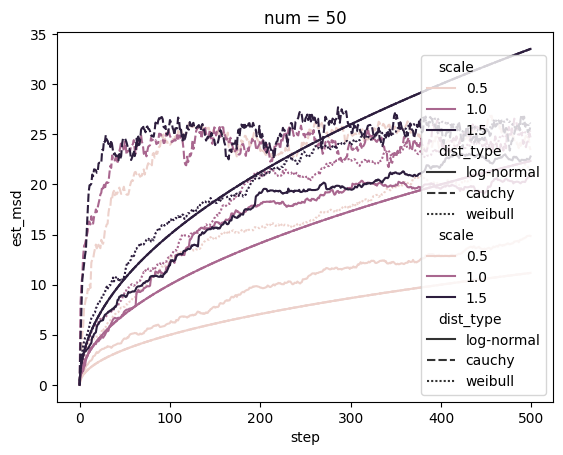

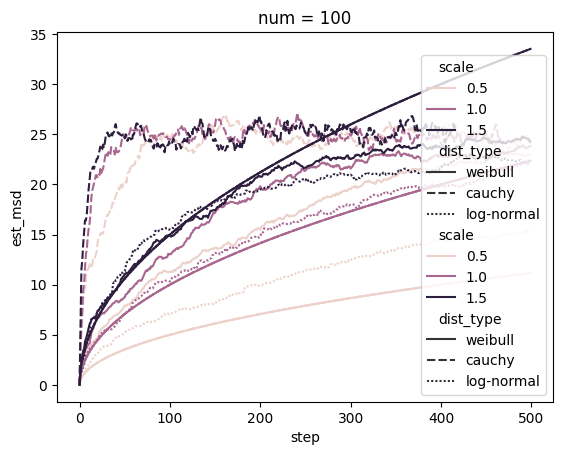

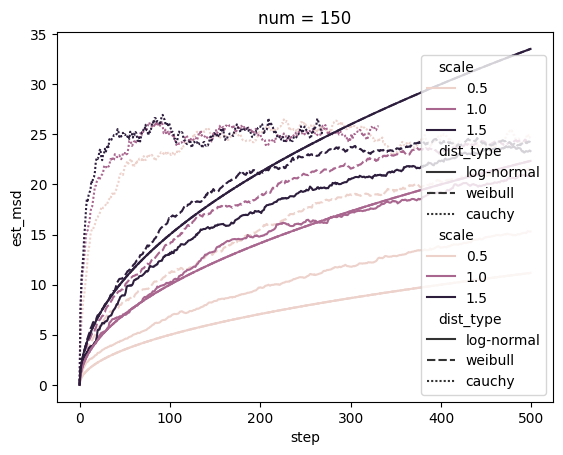

In [48]:
for num in sorted(df['num'].unique()):
    sns.lineplot(data=df[(df['num'] == num) & (df['step'] < 500)], x='step', y='est_msd', hue='scale', style='dist_type').set(title=f'num = {num}')
    sns.lineplot(data=df[(df['num'] == num) & (df['step'] < 500)], x='step', y='th_msd', hue='scale', style='dist_type')
    plt.show()

1. Scale. Different scales leads to different sizes of step. Therefore, estimated msd grows faster for scale 1.5 for all distributions.

![Displacement](img/levy-displacement.png)
![Angles](img/levy-angles.png)

Displacement stays near 0.  
Angles are spread randomly.

## Conclusions

Overall:
1. Analysing metrics for different parameter values helps to find principles, underlying rules of small particles. Understanding these rules, you better control the model. For example, you can change parameters in such way to make it form necessary patterns.
2. Analyses gives you ideas for hypothesis about underlying patterns. Later they can be proved statistically.

Random walks:

CD:
1. msd doesn't depend on num-directions, num-agents. It depends only on step-size.
2. After particular threshold msd almost stops to grow. Agents come to world boundary and their coordinates stably stay near maximum possible coordinates. (30, 30) in current case.
3. Angles form a grid.

Deterministic:
1. Different r - absolutely different patterns of moving.
2. Region of r around r = 3, (1.5; 3.5), seems to be the most problematic to cover the world.
3. For r = 3.8 pattern of turtles moving is very similar to original random walk. Therefore, estimated msd almost soincides with theroretical one for max_pxcor = 30. Whereas, mostly estimated msd doesn't coinside because it isn't original random walk.
4. For r = 0.5 displacement grows until particular measure. Then we have something like stable solution. For r = 3, the same. But now stable solutions are visualized with stable orbits of turtles.
5. Angles plot form from a part to whole parabola.

Levy:
1. Order of distribution types based on cover time, from minimum to maximum: cauchy, weibull, log-normal.
2. Negative correlation between scale parameter and cover time, time to reach border. Proved with Weibull distribution plot.
3. For smaller num of agents num of ticks to reach border is greater.